In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout  # Add this import
# Membaca file CSV
df = pd.read_csv('../dataset/advanced_nutrition_data_ghav.csv')
print(df.head())



   serving_per_package   gula  total_gula  age     bb        diabetes  \
0                    7   2.60       18.20   77  74.99  Tidak Diabetes   
1                    4  17.14       68.56   26  41.57    Ada Diabetes   
2                   13  18.67      242.71   79  98.80  Tidak Diabetes   
3                   11  14.91      164.01   42  94.61    Ada Diabetes   
4                    8  19.79      158.32   23  71.64    Ada Diabetes   

  kategori_gula       rekomendasi  
0   Tinggi Gula  Kurangi Konsumsi  
1   Tinggi Gula  Kurangi Konsumsi  
2   Tinggi Gula  Kurangi Konsumsi  
3   Tinggi Gula  Kurangi Konsumsi  
4   Tinggi Gula  Kurangi Konsumsi  


In [8]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder untuk mengonversi string menjadi integer
label_encoder_kategori = LabelEncoder()
label_encoder_rekomendasi = LabelEncoder()
label_encoder_diabetes = LabelEncoder()  # New LabelEncoder for diabetes

# Encode kolom Kategori Gula, Rekomendasi, and Diabetes
df['kategori_gula'] = label_encoder_kategori.fit_transform(df['kategori_gula'])
df['rekomendasi'] = label_encoder_rekomendasi.fit_transform(df['rekomendasi'])
df['diabetes'] = label_encoder_diabetes.fit_transform(df['diabetes'])

# Convert to appropriate data types (e.g., float for numeric columns)
df['gula'] = df['gula'].astype(float)
df['total_gula'] = df['total_gula'].astype(float)

# Fitur (X) dan Label (y)
X = df[["serving_per_package", "gula", "total_gula", "age", "bb", "diabetes"]].values
y = df[["kategori_gula", "rekomendasi"]].values  # Multi-output label

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Membangun model
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
])

# Compile model
# optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


# Evaluasi
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# # **Simpan Model ke Disk**
# model.save("nutrition_model_5var.h5")
# print("Model berhasil disimpan sebagai 'nutrition_model_5var.h5'.")

c:\Users\galuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8275 - loss: 0.2799 - val_accuracy: 0.8429 - val_loss: 0.0523
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.8643 - loss: 0.0524 - val_accuracy: 0.8867 - val_loss: 0.0433
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.8584 - loss: 0.0439 - val_accuracy: 0.8533 - val_loss: 0.0364
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.8666 - loss: 0.0371 - val_accuracy: 0.9177 - val_loss: 0.0304
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.8824 - loss: 0.0296 - val_accuracy: 0.8277 - val_loss: 0.0371
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 0.8844 - loss: 0.0280 - val_accuracy: 0.8986 - val_loss: 0.0224
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.8952 - loss: 0.0193 - val_accuracy: 0.9287 - val_loss: 0.0256
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.9149 - l

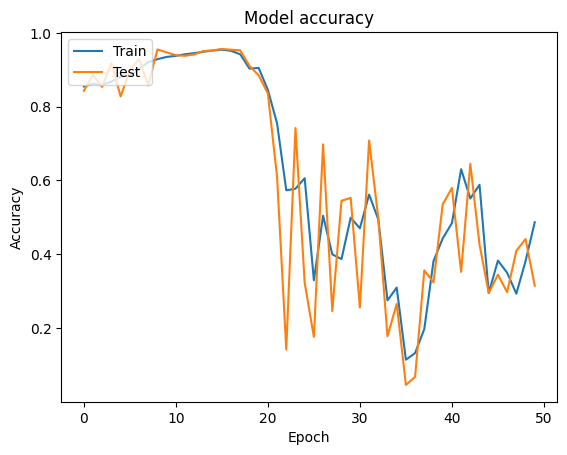

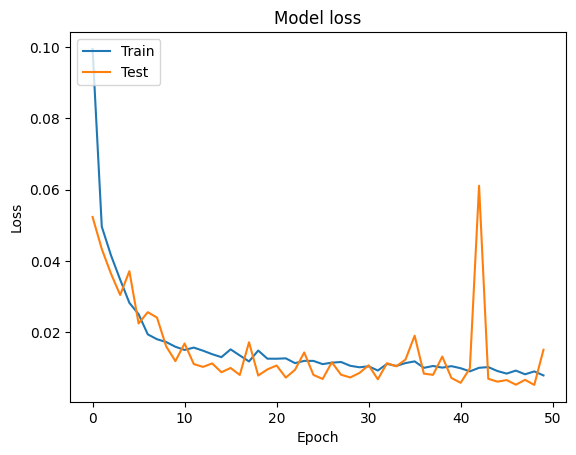

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Contoh data baru
new_data = np.array([[1, 14, 14]])  # serving_per_package, gula, total_gula
# **Memuat Kembali Model (Opsional)**
loaded_model = tf.keras.models.load_model("nutrition_model.h5")
print("Model berhasil dimuat kembali.")
# Prediksi
predictions = loaded_model.predict(new_data)
kategori_gula_pred = "Tinggi Gula" if predictions[0][0] > 0.5 else "Rendah Gula"
rekomendasi_pred = "Kurangi Konsumsi" if predictions[0][1] > 0.5 else "Aman Dikonsumsi"
print(predictions[0][0])
print(predictions[0][1])


print(f"Prediksi Kategori Gula: {kategori_gula_pred}")
print(f"Rekomendasi: {rekomendasi_pred}")


Model berhasil dimuat kembali.
1/1 [==============================] - 0s 33ms/step
0.90676224
0.9016838
Prediksi Kategori Gula: Tinggi Gula
Rekomendasi: Kurangi Konsumsi


In [22]:
import pandas as pd
import numpy as np

def generate_advanced_nutrition_dataset(samples=100000):
    np.random.seed(42)
    serving_per_package = np.random.randint(1, 15, size=samples)
    gula = np.random.uniform(0.5, 20.0, size=samples).round(2)
    total_gula = (serving_per_package * gula).round(2)
    umur = np.random.randint(18, 80, size=samples)  # New variable: age (umur)
    berat_badan = np.random.uniform(40, 120, size=samples).round(2)  # New variable: weight (berat badan)
    diabetes = np.random.choice(['Ada Diabetes', 'Tidak Diabetes'], size=samples, p=[0.3, 0.7])
    kategori_gula = np.where(total_gula > 15, "Tinggi Gula", "Rendah Gula")
    rekomendasi = np.where(total_gula > 15, "Kurangi Konsumsi", "Aman Dikonsumsi")
    
    dataset = pd.DataFrame({
        "serving_per_package": serving_per_package,
        "gula": gula,
        "total_gula": total_gula,
        "age": umur,  # Added age (umur)
        "bb": berat_badan,  # Added weight (berat badan)
        "diabetes": diabetes,
        "kategori_gula": kategori_gula,
        "rekomendasi": rekomendasi
    })
    
    return dataset

# Generate the dataset and save it to a CSV file
advanced_dataset = generate_advanced_nutrition_dataset(100000)
advanced_dataset.to_csv("advanced_nutrition_data.csv", index=False)
print("File 'advanced_nutrition_data.csv' berhasil dibuat!")


File 'advanced_nutrition_data.csv' berhasil dibuat!
